In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential, preprocessing
import numpy as np

In [7]:
"""Reading the directory into training and testing datasets"""
directory = 'meow-woof'
dfTrain = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1000,
    image_size=(50, 50),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset= "training",
    interpolation="bilinear"
)

dfTest = tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1000,
    image_size=(50, 50),
    shuffle=True,
    seed=123,
    validation_split=0.1,
    subset= "validation",
    interpolation="bilinear"
)


Found 8005 files belonging to 2 classes.
Using 7205 files for training.
Found 8005 files belonging to 2 classes.
Using 800 files for validation.


In [10]:
"""Defining the Model"""
cnn = Sequential()
cnn.add(layers.Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(50,50,3))) #convolutional layer
cnn.add(layers.BatchNormalization()) # standaridizes 
cnn.add(layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid')) # pool features

cnn.add(layers.Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn.add(layers.Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
cnn.add(layers.BatchNormalization())
cnn.add(layers.MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

cnn.add(layers.Flatten())

cnn.add(layers.Dense(128,activation='relu'))
cnn.add(layers.Dropout(0.1))
cnn.add(layers.Dense(64,activation='relu'))
cnn.add(layers.Dropout(0.1))
cnn.add(layers.Dense(2,activation='softmax'))

cnn.compile(optimizer = 'adam', #compiling the model 
             loss = "categorical_crossentropy",
              metrics = ["accuracy"])

cnn.fit(dfTrain,epochs=50) # training the model

Epoch 1/50
8/8 [==============================] - 9s 837ms/step - loss: 1.0643 - accuracy: 0.5432
Epoch 2/50
8/8 [==============================] - 9s 860ms/step - loss: 0.6695 - accuracy: 0.6185
Epoch 3/50
8/8 [==============================] - 9s 824ms/step - loss: 0.6233 - accuracy: 0.6615
Epoch 4/50
8/8 [==============================] - 9s 858ms/step - loss: 0.5822 - accuracy: 0.6963
Epoch 5/50
8/8 [==============================] - 9s 852ms/step - loss: 0.5399 - accuracy: 0.7270
Epoch 6/50
8/8 [==============================] - 9s 874ms/step - loss: 0.5014 - accuracy: 0.7531
Epoch 7/50
8/8 [==============================] - 10s 887ms/step - loss: 0.4650 - accuracy: 0.7742
Epoch 8/50
8/8 [==============================] - 9s 888ms/step - loss: 0.4141 - accuracy: 0.8137
Epoch 9/50
8/8 [==============================] - 10s 893ms/step - loss: 0.3736 - accuracy: 0.8341
Epoch 10/50
8/8 [==============================] - 10s 905ms/step - loss: 0.3273 - accuracy: 0.8598
Epoch 11/50
8/8 

In [11]:
"""Evalutating the performance of the model with testing data"""
cnn.evaluate(dfTest)

1/1 [==============================] - 1s 526ms/step - loss: 1.4327 - accuracy: 0.7575


[1.432702898979187, 0.7574999928474426]

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

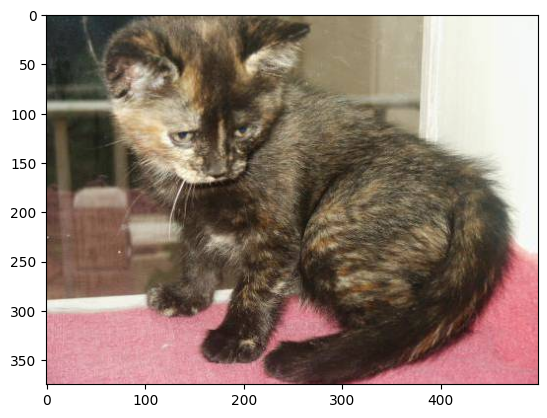

In [18]:
img = mpimg.imread('cat.70.jpg')
imgplot = plt.imshow(img)
plt.show()

In [14]:
def predict_using_cnn(img):
    '''Takes as input a grayscale preprocessed image and returns a prediction using CNN'''
    img_array = tf.keras.preprocessing.image.img_to_array(img) #convert to image array
    img_array= np.array(img_array).reshape(50,50,3)     # reshape to shape accepted by convolutional layer
    img_batch = np.expand_dims(img_array, axis=0)       # convert to array containing the data
    prediction = cnn.predict(x=img_batch,batch_size=1,verbose=0)
    prediction_index = np.argmax(prediction,axis=-1)    # return an array containing the largest value as first element
    # prediction = cnn.predict_classes(x=img_batch,batch_sze=1,verbose=0)
    LABELS=["cat","dog"]
    print(LABELS[prediction_index[0]])

In [17]:
img = tf.keras.preprocessing.image.load_img("cat.70.jpg", target_size=(50, 50))
predict_using_cnn(img)

cat


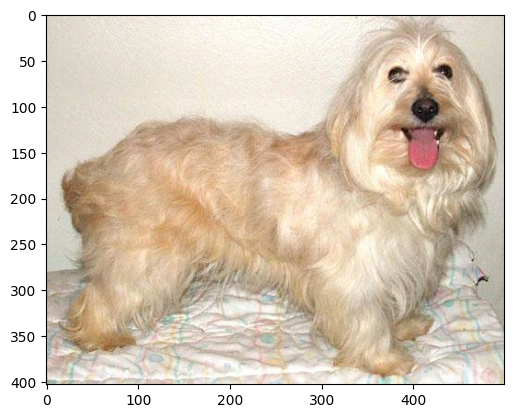

In [19]:
img = mpimg.imread('dog.23.jpg')
imgplot = plt.imshow(img)
plt.show()

In [20]:
img = tf.keras.preprocessing.image.load_img("dog.23.jpg", target_size=(50, 50))
predict_using_cnn(img)

dog
